# Analisis Data Penjualan Supermarket

## PENDAHULUAN
Proyek ini menganalisis dataset historis penjualan dari sebuah perusahaan supermarket, yang mencakup data dari tiga cabang berbeda selama periode tiga bulan. Sumber data berasal dari Kaggle.

Tujuan dari analisis ini adalah untuk menggali wawasan (insight) bisnis dengan menjawab beberapa pertanyaan kunci, seperti: lini produk mana yang paling laris, bagaimana karakteristik tipe pelanggan, bagaimana perbandingan performa antar cabang, dan metode pembayaran apa yang paling populer.

In [1]:
# Mengimpor pustaka/alat yang akan kita gunakan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca file CSV yang sudah diunggah dan menyimpannya dalam variabel 'df'
# 'df' adalah singkatan umum untuk DataFrame, yaitu tabel data di Pandas
df = pd.read_csv('/content/Supermarket Sales Cleaned.csv')

In [2]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,8,3,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000,1000.0
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,15.256000,1.993000,2019.0
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858,8.693563,0.835254,0.0
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,1.000000,1.000000,2019.0
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,8.000000,1.000000,2019.0
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,15.000000,2.000000,2019.0
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,23.000000,3.000000,2019.0
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,31.000000,3.000000,2019.0


# Pertanyaan 1, Produk apa yang paling laris ?

In [5]:
# Mengelompokkan data berdasarkan 'Product line' dan menjumlahkan kolom 'Total'
# .sort_values(ascending=False) untuk mengurutkan dari yang terbesar
penjualan_per_produk = df.groupby('Product line')['Total'].sum().sort_values(ascending=False)

#Menampilkan hasilnya
print(penjualan_per_produk)

Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Total, dtype: float64


/tmp/ipython-input-3435227088.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=penjualan_per_produk.values, y=penjualan_per_produk.index, palette='plasma')


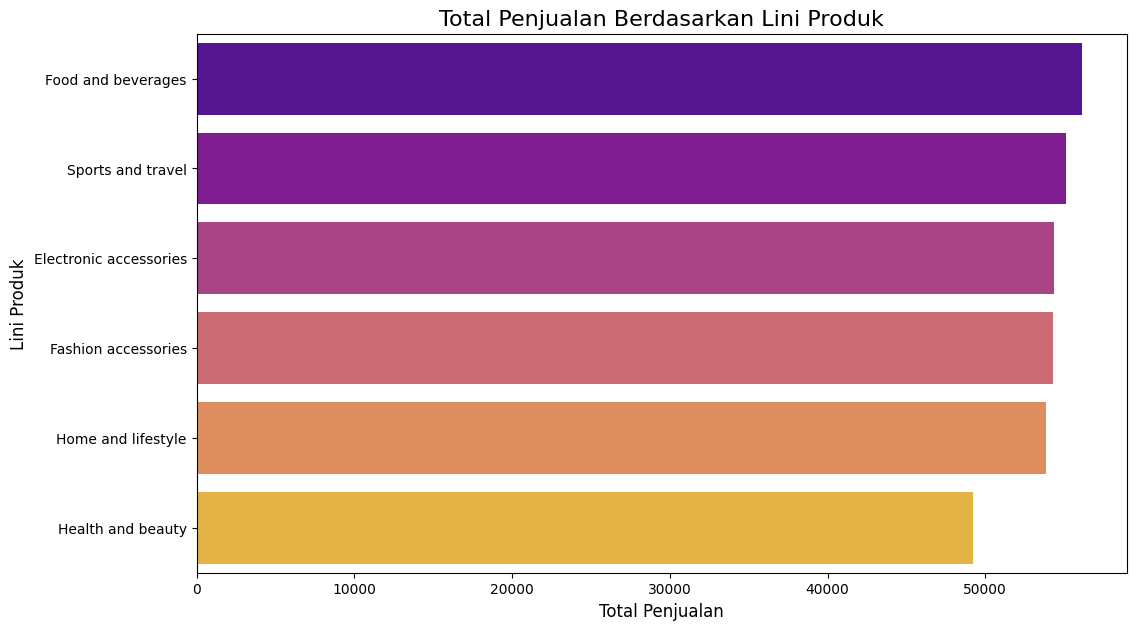

In [6]:
# Mengatur ukuran gambar agar lebih besar dan mudah dibaca
plt.figure(figsize=(12,7))

# Membuat diagram batang dengan seaborn
sns.barplot(x=penjualan_per_produk.values, y=penjualan_per_produk.index, palette='plasma')

# Memberi judul dan label
plt.title('Total Penjualan Berdasarkan Lini Produk', fontsize=16)
plt.xlabel('Total Penjualan', fontsize=12)
plt.ylabel ('Lini Produk', fontsize=12)

#Menampilkan grafik nya
plt.show()

### Dari visualisasi di atas, terlihat jelas bahwa 'Food and beverages' dan 'Sports and travel' adalah dua lini produk dengan total penjualan tertinggi."

# Pertanyaan 2 : Bagaimana tipe Pelanggan ?

In [7]:
tipe_pelanggan = df['Customer type'].value_counts()
print(tipe_pelanggan)



Customer type
Member    501
Normal    499
Name: count, dtype: int64


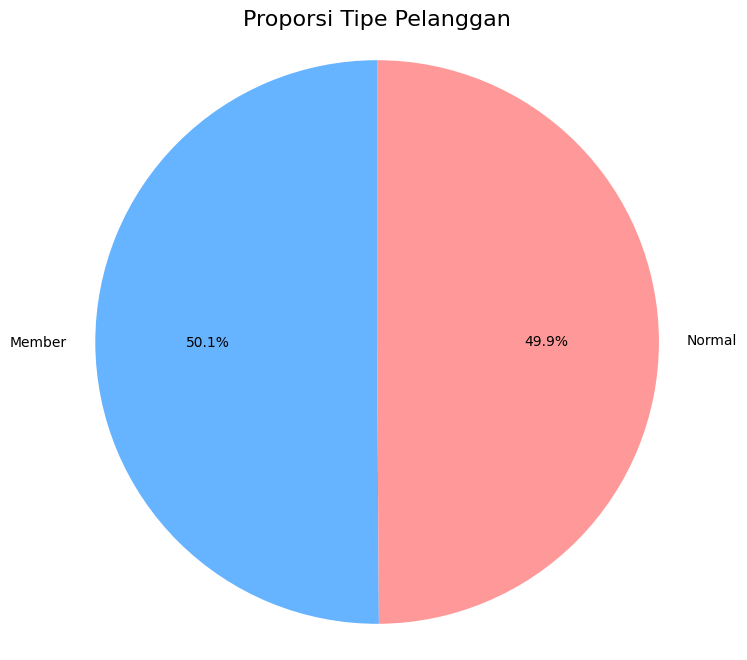

In [8]:
plt.figure(figsize=(8,8))

plt.pie(tipe_pelanggan, labels=tipe_pelanggan.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])

plt.title('Proporsi Tipe Pelanggan', fontsize=16)
plt.axis('equal')
plt.show()

### Grafik menunjukkan bahwa jumlah transaksi antara pelanggan Member (50.1%) dan Normal (49.9%) hampir seimbang sempurna. Ini menandakan bahwa baik pelanggan terdaftar maupun pelanggan biasa sama-sama aktif berbelanja, dan tidak ada dominasi signifikan dari satu kelompok pelanggan dalam hal frekuensi kunjungan.

#Pertanyaan 3 : Cabang mana yang mendominasi ?

In [9]:
rating_cabang = df.groupby('Branch')['Rating'].mean().sort_values(ascending=False)

print(rating_cabang)

Branch
C    7.072866
A    7.027059
B    6.818072
Name: Rating, dtype: float64


/tmp/ipython-input-2879525746.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_cabang.index, y=rating_cabang.values, palette='viridis')


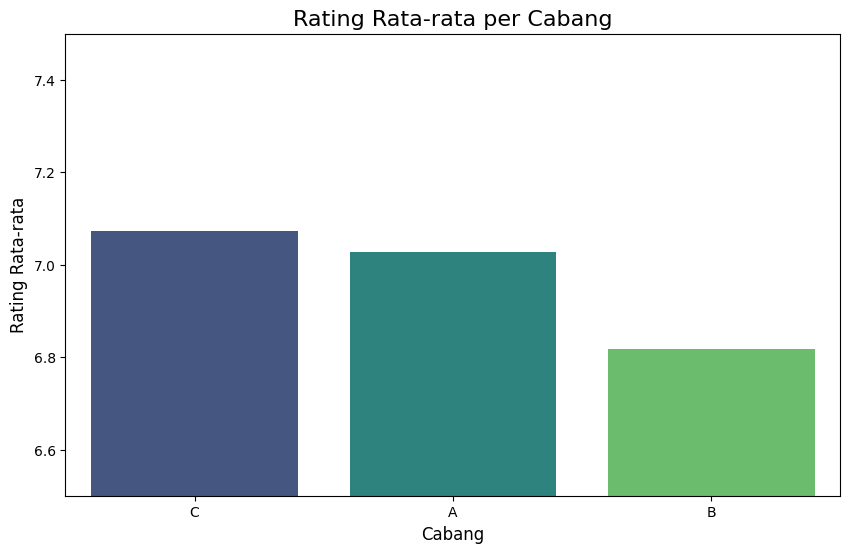

In [10]:
# Mengatur ukuran gambar
plt.figure(figsize=(10, 6))

# Membuat diagram batang
sns.barplot(x=rating_cabang.index, y=rating_cabang.values, palette='viridis')

# Memberi judul dan label
plt.title('Rating Rata-rata per Cabang', fontsize=16)
plt.xlabel('Cabang', fontsize=12)
plt.ylabel('Rating Rata-rata', fontsize=12)
plt.ylim(6.5, 7.5) # Mengatur batas sumbu y agar perbedaan lebih terlihat

# Menampilkan grafiknya
plt.show()

### Meskipun ada sedikit perbedaan, ketiga cabang (A, B, dan C) menunjukkan tingkat kepuasan pelanggan yang sangat mirip, dengan rating rata-rata yang tergolong tinggi (semuanya berkisar di angka 7.0). Hal ini mengindikasikan bahwa kualitas layanan dan pengalaman pelanggan relatif konsisten dan positif di semua lokasi supermarket.

# Pertanyaan 4 : Metode pembayaran mana yang paling populer ?

In [11]:
# Menghitung jumlah setiap metode pembayaran
metode_bayar = df['Payment'].value_counts()

# Menampilkan hasilnya
print(metode_bayar)

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64


/tmp/ipython-input-3933424834.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metode_bayar.index, y=metode_bayar.values, palette='magma')


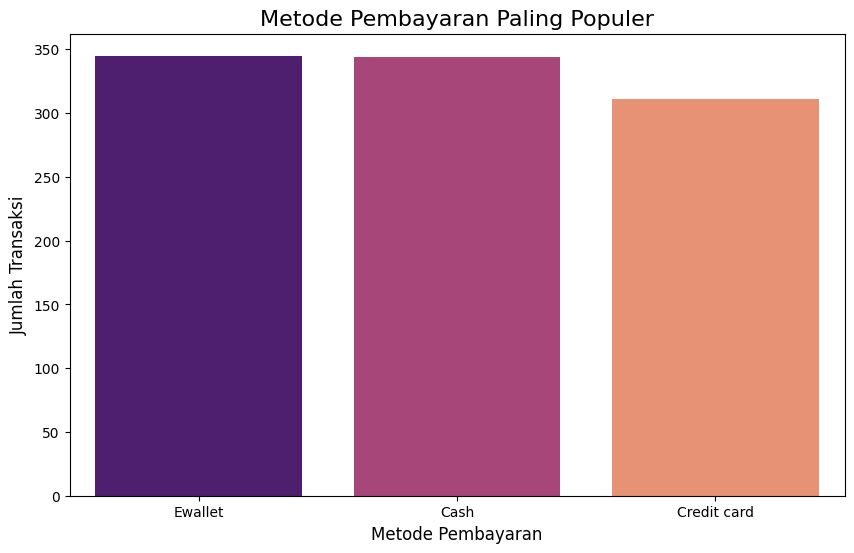

In [12]:
# Mengatur ukuran gambar
plt.figure(figsize=(10, 6))

# Membuat diagram batang
sns.barplot(x=metode_bayar.index, y=metode_bayar.values, palette='magma')

# Memberi judul dan label
plt.title('Metode Pembayaran Paling Populer', fontsize=16)
plt.xlabel('Metode Pembayaran', fontsize=12)
plt.ylabel('Jumlah Transaksi', fontsize=12)

# Menampilkan grafiknya
plt.show()

### analisis menunjukkan bahwa Ewallet dan Cash adalah dua metode pembayaran yang paling dominan dan hampir sama populernya di kalangan pelanggan. Penggunaan Credit Card secara signifikan lebih rendah, menandakan bahwa pelanggan di ketiga cabang ini lebih memilih metode pembayaran digital cepat atau pembayaran tunai langsung.